In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#os.chdir("/content/gdrive/MyDrive/fruitsPommeCeriseOrange")  #sert a définir le chemin ou le dossier de travail dans google drive. 
#sys.path.append("/content/gdrive/MyDrive/fruitsPommeCeriseOrange") #sert a définir le chemin ou le dossier de travail dans google drive. 

#!cp -r <'PATH_TO_PNG_FOLDER'> /content/gdrive/My Drive/    #sa ne marche tentative regler probleme dajout dimage des video dans le Drive https://datascience.stackexchange.com/questions/64131/how-to-save-dynamic-files-from-colab-to-google-drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
img_height, img_width = 32, 32
batch_size = 20

train_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/fruitsPommeCeriseOrange",
   # "fruitsPommeCeriseOrange/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/fruitsPommeCeriseOrange/validation",
   # "fruitsPommeCeriseOrange/validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/fruitsPommeCeriseOrange/test",
    #"fruitsPommeCeriseOrange/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 590 files belonging to 3 classes.
Found 60 files belonging to 3 classes.
Found 119 files belonging to 3 classes.


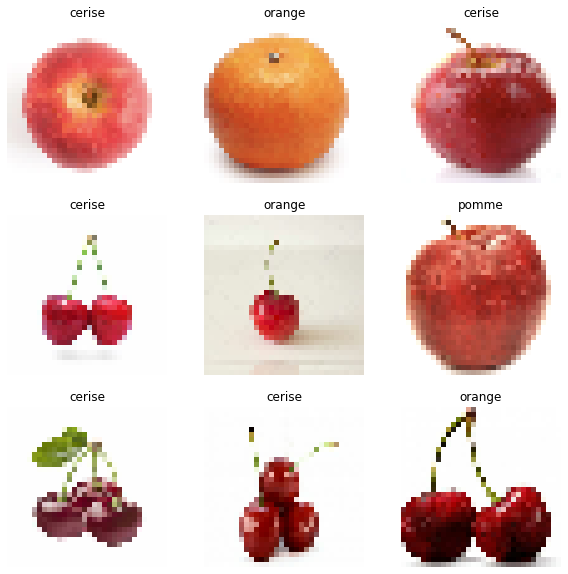

In [ ]:
class_names = ["pomme", "cerise", "orange"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(3)
    ]
)


In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

In [ ]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 20
)

Epoch 1/20
30/30 [==============================] - 12s 336ms/step - loss: 0.8492 - accuracy: 0.6966 - val_loss: 1.4068 - val_accuracy: 0.2667
Epoch 2/20
30/30 [==============================] - 13s 393ms/step - loss: 0.8180 - accuracy: 0.6966 - val_loss: 1.4699 - val_accuracy: 0.2667
Epoch 3/20
30/30 [==============================] - 13s 406ms/step - loss: 0.8120 - accuracy: 0.6966 - val_loss: 1.6255 - val_accuracy: 0.2667
Epoch 4/20
30/30 [==============================] - 11s 296ms/step - loss: 0.8066 - accuracy: 0.6966 - val_loss: 1.4830 - val_accuracy: 0.2667
Epoch 5/20
30/30 [==============================] - 11s 337ms/step - loss: 0.8106 - accuracy: 0.6966 - val_loss: 1.3417 - val_accuracy: 0.2667
Epoch 6/20
30/30 [==============================] - 11s 294ms/step - loss: 0.8018 - accuracy: 0.6966 - val_loss: 1.4043 - val_accuracy: 0.2667
Epoch 7/20
30/30 [==============================] - 11s 335ms/step - loss: 0.7901 - accuracy: 0.6966 - val_loss: 1.3909 - val_accuracy: 0.2667

TEST1 sa fuck apres 40 generation yer a 0.27 de précision. 

L'autre est a 0.90 de précision 

y doit avoir un bug a une place

Après avoir revue les image et retirer toute les image qui 

représentais un groupe de cerise 

et focuser sur les cerises individuel cela a grandement augmenter la précision

TEST2 après 40 génération il a une precison de 0.9038

je doute que sa marche accuracy: 0.9038

val_accuracy: 0.1970

pt que la val_accuracy est la vrai valeur de precision

TEST3

In [ ]:
model.evaluate(test_ds)

7/7 [==============================] - 1s 7ms/step - loss: 2.1560 - accuracy: 0.3407


[2.1559793949127197, 0.34074074029922485]

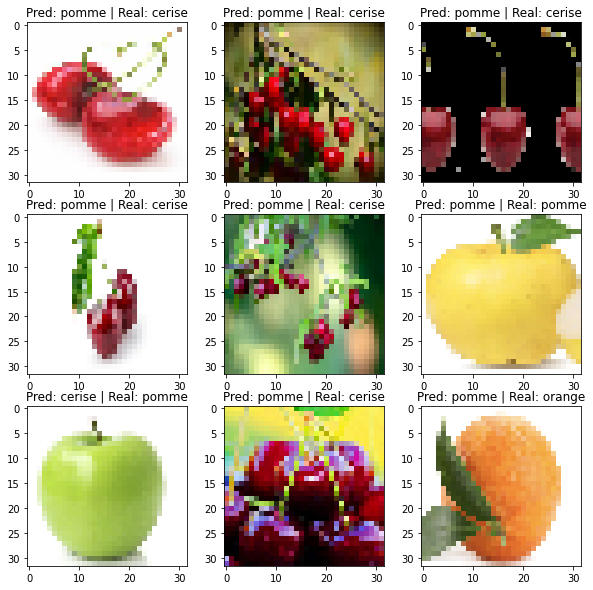

In [ ]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)
  
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("modelPommeCeriseOrange1.tflite", 'wb') as f:
  f.write(tflite_model)